In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os

In [2]:
# 1. Setup paths and find a file to explore
data_files = glob.glob("../data/*.csv")
print(f"Total files found: {len(data_files)}")

# Let's take the first one as an example
sample_path = data_files[49]
df = pd.read_csv(sample_path)
oid = os.path.basename(sample_path).replace("_detections.csv", "")



Total files found: 81


Exploring Object: ZTF25aanpvix


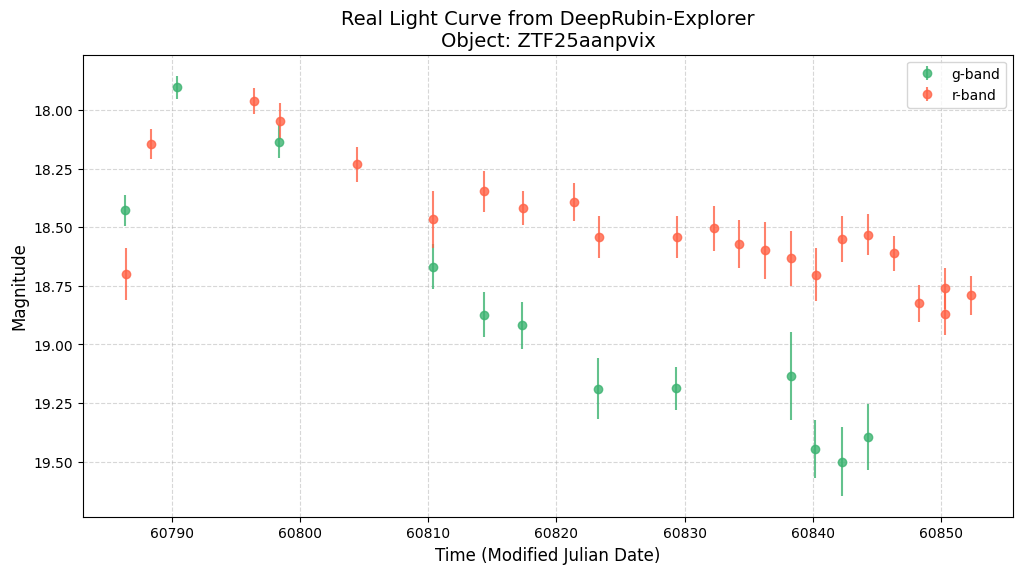

In [3]:
print(f"Exploring Object: {oid}")

# 2. Plotting the Light Curve
plt.figure(figsize=(12, 6))

# ZTF passbands: 1 = g (green), 2 = r (red)
colors = {1: 'mediumseagreen', 2: 'tomato'}
labels = {1: 'g-band', 2: 'r-band'}

for fid in df['fid'].unique():
    subset = df[df['fid'] == fid]
    plt.errorbar(
        subset['mjd'], 
        subset['magpsf'], 
        yerr=subset['sigmapsf'], 
        fmt='o', 
        color=colors.get(fid, 'gray'),
        label=labels.get(fid, f'Filter {fid}'),
        alpha=0.8,
        markersize=6
    )

# 3. Scientific Formatting
plt.gca().invert_yaxis()  # IMPORTANT: Smaller magnitude = Brighter object
plt.title(f"Real Light Curve from DeepRubin-Explorer\nObject: {oid}", fontsize=14)
plt.xlabel("Time (Modified Julian Date)", fontsize=12)
plt.ylabel("Magnitude", fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()